In [81]:
import sys

sys.path.append("detection doublons/src") # for adding the directory "src"
from processing_functions import *
from visualization import *


import numpy as np
import pandas as pd
from pandas import DataFrame



## Chargement des données

In [82]:
original_data=pd.read_csv("detection doublons/data/gold_fornissor.csv")
data=original_data.copy()


## Analyse exploratoire

#### Dimension des données

In [83]:
data.shape

(58005, 9)

#### Noms des colonnes

In [84]:
data.columns

Index(['tiern_location_state_city', 'tiern_name', 'tiern_plant', 'id',
       'confidence_country', 'Latitude', 'Longitude', 'Country',
       'confidence_city'],
      dtype='object')

#### Types des données 
Pour la détecter des eventuels incohérences

In [85]:
data.dtypes

tiern_location_state_city     object
tiern_name                    object
tiern_plant                   object
id                             int64
confidence_country           float64
Latitude                     float64
Longitude                    float64
Country                       object
confidence_city              float64
dtype: object

#### Données manquantes

In [86]:
# Données manquantes
data.isnull().sum()

tiern_location_state_city        1
tiern_name                       0
tiern_plant                  17314
id                               0
confidence_country               0
Latitude                         0
Longitude                        0
Country                          0
confidence_city                  0
dtype: int64

#### Données dupliquées

In [87]:
# Données dupliquées : aucune données dupliquées selon le dataframe original
data.loc[data.duplicated(),:]

,tiern_location_state_city,tiern_name,tiern_plant,id,confidence_country,Latitude,Longitude,Country,confidence_city


## Traitement A
Etant donné que nous soommes intéressé par les colonnes "tiern_name"  et "tiern_plant", nous allons commencer l'analyse des doublons en supprimant les colonnes "id" , "confidence_city" et "confidence_country" qui ne nous servent pas réellemnt. <br>
La suppression de ces colonnes nous permet de pourvoir détecté quelques doublons.   

#### Extraction de colonnes
Colonnes sur lesquelles ont souhaites faire des traitemen

In [88]:
n_data=data.drop(["id", "confidence_country","confidence_city", "Latitude","Longitude"], axis=1).copy()
n_data.head(5)

,tiern_location_state_city,tiern_name,tiern_plant,Country
0,ba,j ss w e s let,indil iim iet ndd nv uma msi a,Fiji
1,qom,matin fanar matin fanar,NaN,Iran
2,arak,arak petro,arak,Iran
3,arak,iralco iralco,NaN,Iran
4,arak,iralco alominum factory,iralco arak,Iran


In [89]:
# Appliquer la fonction à chaque colonne du DataFrame
n_data = process_dataframe_str(n_data)
# n_data.head()

In [90]:
n_data["tiern_name_concat_plant"] = n_data.apply(lambda row: row["tiern_name"] + " " + row["tiern_plant"], axis=1)
n_data["tiern_name_preprocessed"] = n_data["tiern_name_concat_plant"]
# n_data.head(5)

In [91]:
dupl_av_trait=n_data.loc[n_data[["tiern_location_state_city", "tiern_name_preprocessed","Country"]].duplicated(keep=False), :]
dupl_av_trait.head(5)

,tiern_location_state_city,tiern_name,tiern_plant,Country,tiern_name_concat_plant,tiern_name_preprocessed
232,wuhan,sunrise,sunrise machinery,china,sunrise sunrise machinery,sunrise sunrise machinery
385,wuhan,sunrise sunrise,machinery,china,sunrise sunrise machinery,sunrise sunrise machinery
862,weihai,samas,,china,samas,samas
914,xiamen,tdk,tdk xiamen,china,tdk tdk xiamen,tdk tdk xiamen
918,xiamen,tdk,tdk xiamen,china,tdk tdk xiamen,tdk tdk xiamen


In [92]:
# # data.loc["tiern_location_state_city", "tiern_name","Country", "tiern_plant"][914]
# # data.loc[["tiern_location_state_city", "tiern_name_preprocessed","Country"]]
# data.loc[[914, 918]][["tiern_location_state_city","tiern_name", "tiern_plant","Country"]]
# # data.loc["xiamen"][["tiern_location_state_city","tiern_name", "tiern_plant","Country"]]
# data.loc[(data["tiern_location_state_city"]=="xiamen") & (data["tiern_name"]=="tdk"), :]

In [93]:
unique=n_data.loc[~n_data[["tiern_location_state_city", "tiern_name_preprocessed","Country"]].duplicated(), :]
unique.shape

(55842, 6)

### Distribution des données uniques et dupliquées  avant traitement

In [94]:

# pie_chart_bokeh(n_data, ["tiern_location_state_city", "tiern_name_preprocessed","Country"])

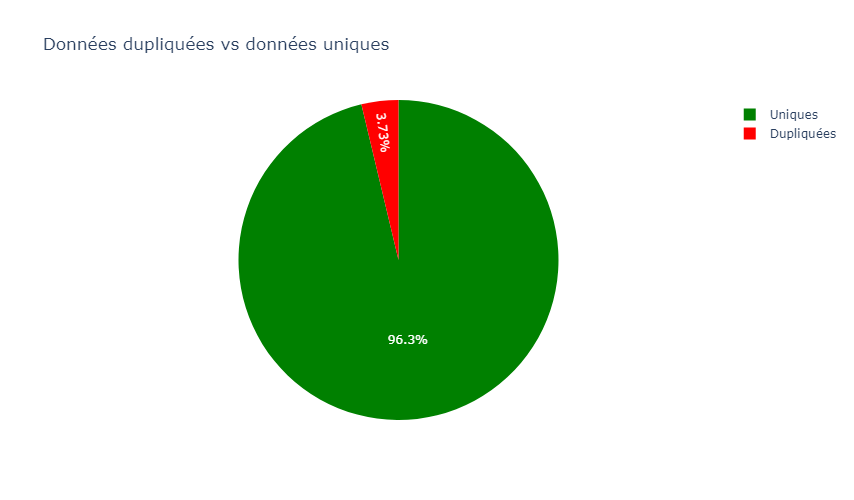

In [95]:
pie_chart_ploty(n_data, ["tiern_location_state_city", "tiern_name_preprocessed","Country"])

In [96]:
from math import pi

import pandas as pd

from bokeh.palettes import Category10, Paired, Dark2, GnBu, Set2, Category20
from bokeh.plotting import figure, show
from bokeh.transform import cumsum

x = {
    'United States': 180,
    'United Kingdom': 180,
    
}

data = pd.Series(x).reset_index(name='value').rename(columns={'index': 'country'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20[20][:len(x)]

p = figure(height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@country: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='country', source=data)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None

show(p)

In [97]:
#n_data["tiern_name_preprocessed"]=n_data[["tiern_location_state_city", "tiern_name_preprocessed"]].map(suppr("tiern_name_preprocessed"))
n_data["tiern_name_preprocessed"] = n_data.apply(lambda row: remove_pattern(row["tiern_location_state_city"], row["tiern_name_preprocessed"]), axis=1)
# n_data.head(5)

#### Distribution des données uniques et dupliquées  après suppressions des noms de ville dans les noms des fournisseurs

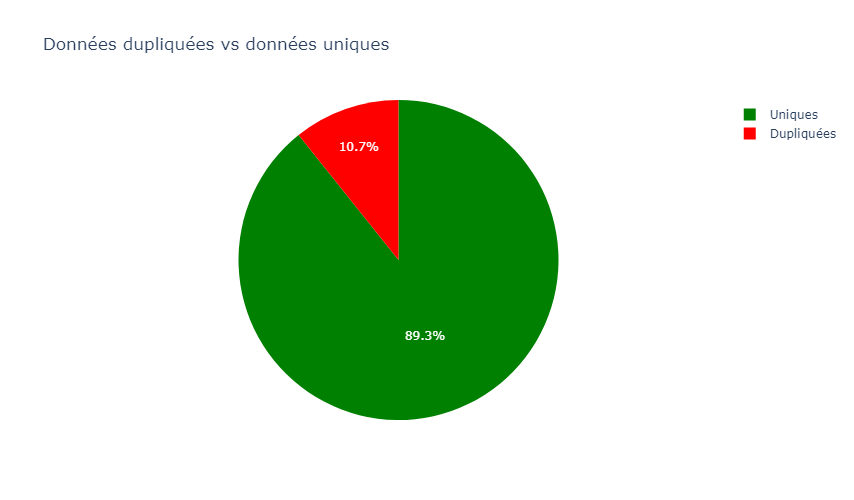

In [98]:
pie_chart_ploty(n_data, ["tiern_location_state_city", "tiern_name_preprocessed","Country"])

#### Distribution des données uniques et dupliquées  après suppressions des noms de ville et pays dans les noms des fournisseurs

In [99]:
n_data["tiern_name_preprocessed"] = n_data.apply(lambda row: remove_pattern(row["Country"], row["tiern_name_preprocessed"]), axis=1)
# n_data.head(5)

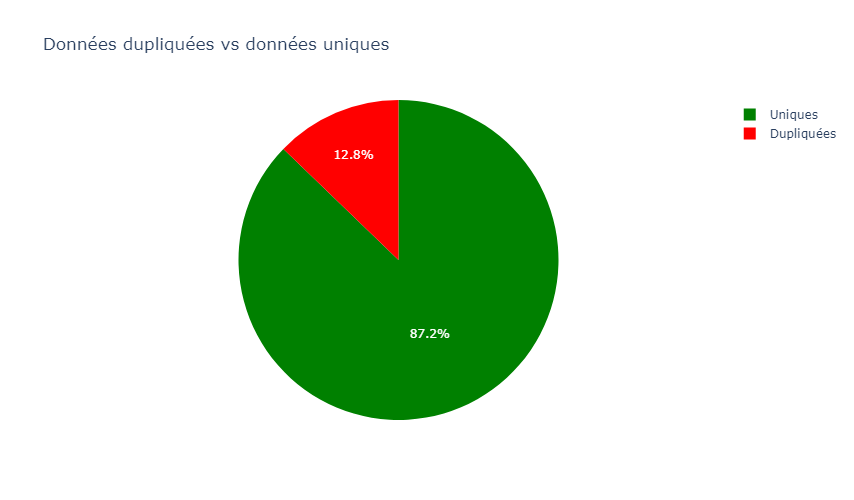

In [100]:
pie_chart_ploty(n_data, ["tiern_location_state_city", "tiern_name_preprocessed","Country"])

#### Distribution des données uniques et dupliquées  après suppressions des noms de ville, pays et des doublons dans les noms des fournisseurs

In [101]:
n_data["tiern_name_preprocessed"]=n_data["tiern_name_preprocessed"].map(remove_duplication)
# n_data.tail(5)

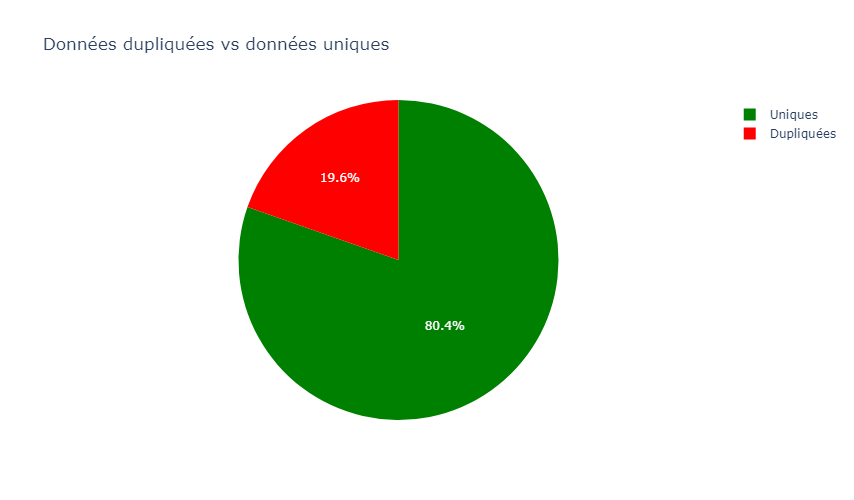

In [102]:
pie_chart_ploty(n_data, ["tiern_location_state_city", "tiern_name_preprocessed","Country"])

#### Visualisation des duplications sans consération des espace blanc dans les noms
Il y a des données ayant exactement les mêmes noms mais des espaces blancs dans le nom de certains <br>
Pour cela nous allons concatener les caratères contituant les noms des fournisseurs que nous stockons dans une colonnes "chars" afin de détecter d'avantage de doublons

In [103]:
n_data["chars"] = n_data["tiern_name_preprocessed"].map(chaine_to_chars)

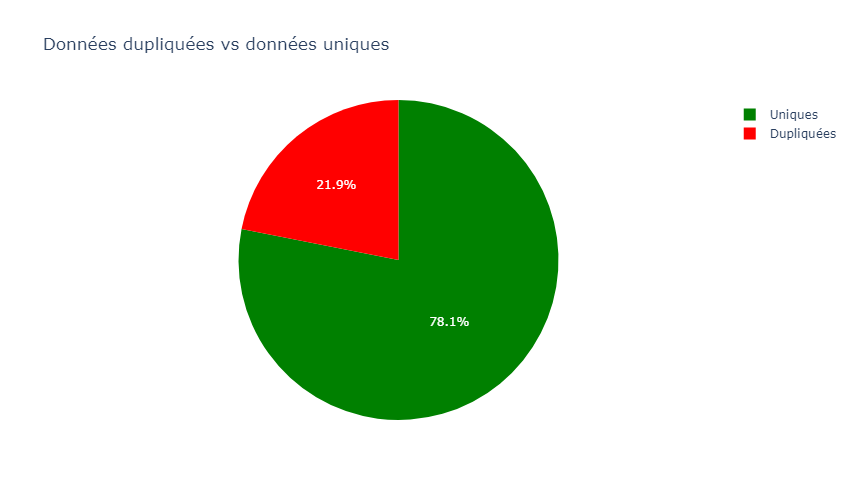

In [104]:
pie_chart_ploty(n_data, ["tiern_location_state_city", "chars","Country"])

### Traitement B
Pour ce traitement, nous allons d'abord commencer par supprimer tous les caractères spéciaux (écriture chinois dans les noms des fournisseurs, des chiffres dont on ne sait pas ce qu'ils representent). 

In [105]:
original_data=pd.read_csv("detection doublons/data/gold_fornissor.csv")
data=original_data.copy()
n_data=data.drop(["id", "confidence_country","confidence_city", "Latitude","Longitude"], axis=1).copy()
total_samples =n_data.shape[0]
data.shape

(58005, 9)

In [26]:
data.shape

(58005, 9)

In [27]:
# Appliquer la fonction à chaque colonne du DataFrame
n_data = process_dataframe_str(n_data)
n_data.head()

,tiern_location_state_city,tiern_name,tiern_plant,Country
0,ba,j ss w e s let,indil iim iet ndd nv uma msi a,fiji
1,qom,matin fanar matin fanar,,iran
2,arak,arak petro,arak,iran
3,arak,iralco iralco,,iran
4,arak,iralco alominum factory,iralco arak,iran


In [28]:
n_data["tiern_name_preprocessed"] = n_data.apply(lambda row: row["tiern_name"] + " " + row["tiern_plant"], axis=1)
#n_data["tiern_name_preprocessed"] = n_data["tiern_name_concat_plant"]
n_data.head(5)

,tiern_location_state_city,tiern_name,tiern_plant,Country,tiern_name_preprocessed
0,ba,j ss w e s let,indil iim iet ndd nv uma msi a,fiji,j ss w e s let indil iim iet ndd nv uma msi a
1,qom,matin fanar matin fanar,,iran,matin fanar matin fanar
2,arak,arak petro,arak,iran,arak petro arak
3,arak,iralco iralco,,iran,iralco iralco
4,arak,iralco alominum factory,iralco arak,iran,iralco alominum factory iralco arak


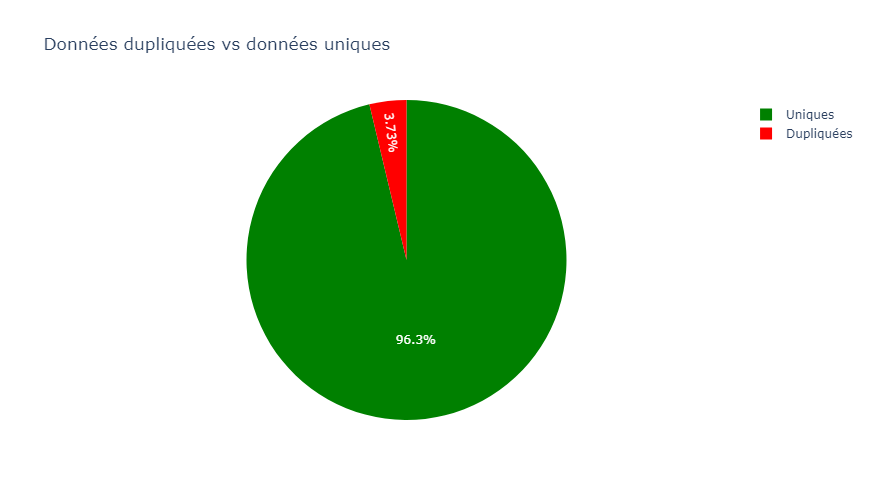

In [29]:
pie_chart_ploty(n_data, ["tiern_location_state_city", "tiern_name_preprocessed","Country"])

In [30]:
pattern=r'\d+'
dataframe_nombres=detect_pattern(n_data, "tiern_name_preprocessed", pattern)
dataframe_nombres.shape

(3032, 5)

In [31]:
dataframe_nombres.head(5)

,tiern_location_state_city,tiern_name,tiern_plant,Country,tiern_name_preprocessed
43,tehran,fcaes 2366701x,,iran,fcaes 2366701x
79,tehran,crouse,plant 3,iran,crouse plant 3
263,wuhan,sp781b t0 75 gjss anjia wuhanl,,china,sp781b t0 75 gjss anjia wuhanl
374,wuhan,xmc wuhan issi,no 18,china,xmc wuhan issi no 18
380,wuhan,1 wuhan kotobukiya 2 han quan,wuhan plant wuhan plant,china,1 wuhan kotobukiya 2 han quan wuhan plant wuha...


In [32]:
n_data=n_data.drop(index=dataframe_nombres.index)
n_data.shape

(54973, 5)

In [33]:
n_data.tail(30)

,tiern_location_state_city,tiern_name,tiern_plant,Country,tiern_name_preprocessed
57975,dubai,dubal dubai u a e,,united arab emirates,dubal dubai u a e
57976,dubai,dubal,dubai u a e,united arab emirates,dubal dubai u a e
57977,dubai,raychem tyco tyco,,united arab emirates,raychem tyco tyco
57978,dubai,trading fze,trading fze,united arab emirates,trading fze trading fze
57979,dubai,refco dubai,,united arab emirates,refco dubai
57980,dubai,pacific,dubai,united arab emirates,pacific dubai
57981,dubai,mssl,,united arab emirates,mssl
57982,dubai,dubal,dubal,united arab emirates,dubal dubal
57983,dubai,dubal dubai,,united arab emirates,dubal dubai
57984,dubai,toyota toyota tsusho tsusho,,united arab emirates,toyota toyota tsusho tsusho


In [34]:
pattern=r'[a-z]+'
dataframe_sans_char_speciaux=detect_pattern(n_data, "tiern_name_preprocessed", pattern)
dataframe_sans_char_speciaux.shape

(54830, 5)

In [35]:
dataframe_sans_char_speciaux.head(5)

,tiern_location_state_city,tiern_name,tiern_plant,Country,tiern_name_preprocessed
0,ba,j ss w e s let,indil iim iet ndd nv uma msi a,fiji,j ss w e s let indil iim iet ndd nv uma msi a
1,qom,matin fanar matin fanar,,iran,matin fanar matin fanar
2,arak,arak petro,arak,iran,arak petro arak
3,arak,iralco iralco,,iran,iralco iralco
4,arak,iralco alominum factory,iralco arak,iran,iralco alominum factory iralco arak


In [36]:
dataframe_sans_char_speciaux.columns

Index(['tiern_location_state_city', 'tiern_name', 'tiern_plant', 'Country',
       'tiern_name_preprocessed'],
      dtype='object')

In [37]:
dataframe_sans_char_speciaux.loc[[11,26,28]][['tiern_location_state_city', 'tiern_name', 'tiern_plant', 'Country']]

,tiern_location_state_city,tiern_name,tiern_plant,Country
11,karaj,iran chasb,,iran
26,qazvin,iranpu,iran qazvin,iran
28,qazvin,iran pu,iran qazvin,iran


In [38]:
dataframe_char_speciaux=n_data.drop(index=dataframe_sans_char_speciaux.index)
dataframe_char_speciaux.shape

(143, 5)

In [39]:
dataframe_char_speciaux.head()

,tiern_location_state_city,tiern_name,tiern_plant,Country,tiern_name_preprocessed
153,zibo,石油化工股份有限公司齐鲁分公司,,china,石油化工股份有限公司齐鲁分公司
165,hefei,安徽凯瑞,安徽工厂,china,安徽凯瑞 安徽工厂
167,hefei,安徽凯瑞汽配制造有限公司,安徽凯瑞汽配制造有限公司,china,安徽凯瑞汽配制造有限公司 安徽凯瑞汽配制造有限公司
169,hefei,安徽凯瑞,安徽凯瑞汽配制造有限公司,china,安徽凯瑞 安徽凯瑞汽配制造有限公司
174,hefei,安徽佳元工业纤维有限公司,,china,安徽佳元工业纤维有限公司


In [40]:
dataframe_dropped=pd.concat((dataframe_char_speciaux,dataframe_nombres), axis=0)
dataframe_dropped.head(5)

,tiern_location_state_city,tiern_name,tiern_plant,Country,tiern_name_preprocessed
153,zibo,石油化工股份有限公司齐鲁分公司,,china,石油化工股份有限公司齐鲁分公司
165,hefei,安徽凯瑞,安徽工厂,china,安徽凯瑞 安徽工厂
167,hefei,安徽凯瑞汽配制造有限公司,安徽凯瑞汽配制造有限公司,china,安徽凯瑞汽配制造有限公司 安徽凯瑞汽配制造有限公司
169,hefei,安徽凯瑞,安徽凯瑞汽配制造有限公司,china,安徽凯瑞 安徽凯瑞汽配制造有限公司
174,hefei,安徽佳元工业纤维有限公司,,china,安徽佳元工业纤维有限公司


In [41]:
dataframe_dropped.tail(5)

,tiern_location_state_city,tiern_name,tiern_plant,Country,tiern_name_preprocessed
57808,willenhall,1270d bollhoff,bollhoff,united kingdom,1270d bollhoff bollhoff
57850,north shields,freudenberg 05 07 2010technical products,ftp,united kingdom,freudenberg 05 07 2010technical products ftp
57854,west bromwich,heat treat 2000 ltd,heat treat 2000 ltd,united kingdom,heat treat 2000 ltd heat treat 2000 ltd
57896,usk,500305880,,united kingdom,500305880
57952,sheffield,kiveton park steel raw material 17cr3,,united kingdom,kiveton park steel raw material 17cr3


In [42]:
assert dataframe_char_speciaux.shape[0] +dataframe_nombres.shape[0] == dataframe_dropped.shape[0]

#### Distribtion des données avec et sans caratères spaéciaux
Nous appellons données ayant des caracères spéciaux, toute données dont le nom du fournisseur ou de l'usine contient des caractères non ASCII ou des nombres. <br>
Pour le moment nous ne savons pas si ces nombres font référence  à des adresses ou à des identifiants du fournisseur. 

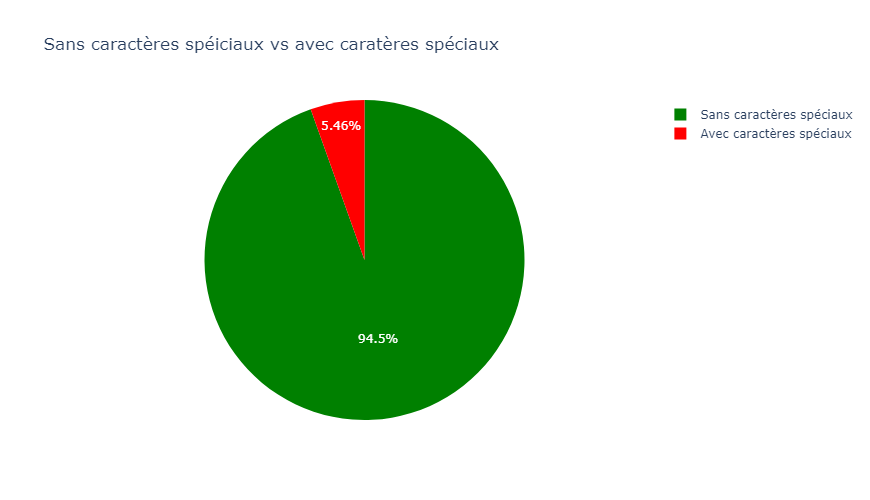

In [43]:
dataframe_dropped.shape[0] + n_data.shape[0] == total_samples 

# diagram = [n_data.shape[0]/ total_samples , dataframe_dropped.shape[0]/total_samples ]
# labels = ['Sans caractères spéciaux', 'Caractères spéciaux'] # Labels
# colors = ['green', 'red'] # Couleurs

# plt.figure(figsize=(6,6)) # Taille de la figure
# plt.pie(diagram, labels=labels, colors=colors,autopct='%1.1f%%') # Création du camanbert 
# # plt.title(titre, fontsize=16) # Titre
# plt.show() # Affichge du graphique

x = {
    'Sans caractères spéciaux': n_data.shape[0]/ total_samples,
    'Avec caractères spéciaux': dataframe_dropped.shape[0]/total_samples
}

dataa = pd.Series(x).reset_index(name='Proportion').rename(columns={'index': 'Type'})

fig = px.pie(dataa, values='Proportion', names='Type', width=800, height=400, title="Sans caractères spéiciaux vs avec caratères spéciaux", color_discrete_sequence=['green', 'red'])
fig.update_layout(autosize=False,width=500,height=500)
fig.show()

##### Analyse des données sans caractères spéciaux
Ici nous ferons une analyse complète quand à la présence de doublons dans le dataframe restant ( datsframe sans caractère spéciaux). L'analyse est exactement pareil que celle du traitement A

### Distribution des données uniques et dupliquées  avant traitement

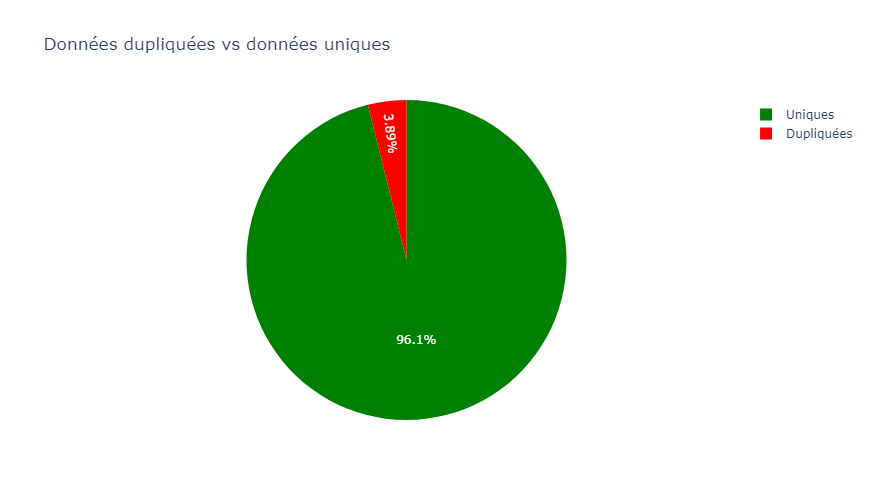

In [44]:
pie_chart_ploty(n_data, ["tiern_location_state_city", "tiern_name_preprocessed","Country"])

#### Distribution des données uniques et dupliquées  après suppressions des noms de ville dans les noms des fournisseurs

In [45]:
#n_data["tiern_name_preprocessed"]=n_data[["tiern_location_state_city", "tiern_name_preprocessed"]].map(suppr("tiern_name_preprocessed"))
n_data["tiern_name_preprocessed"] = n_data.apply(lambda row: remove_pattern(row["tiern_location_state_city"], row["tiern_name_preprocessed"]), axis=1)
# n_data.head(5)

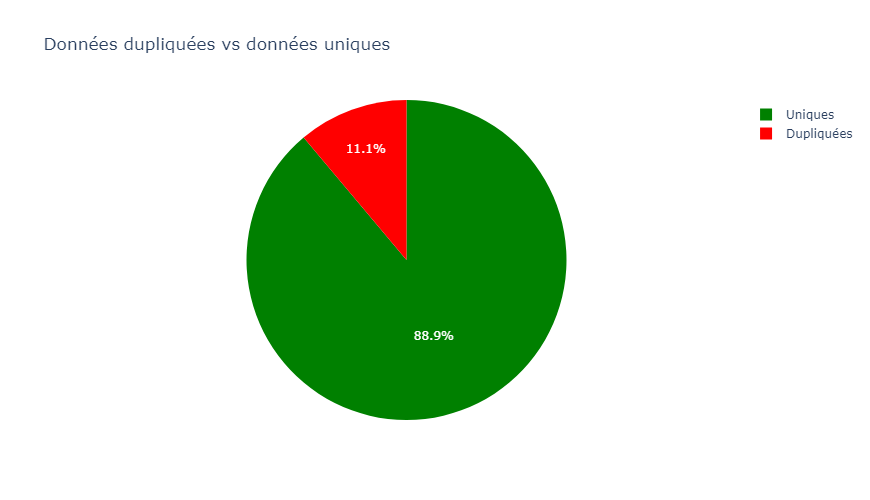

In [46]:
pie_chart_ploty(n_data, ["tiern_location_state_city", "tiern_name_preprocessed","Country"])

#### Distribution des données uniques et dupliquées  après suppressions des noms de ville et pays dans les noms des fournisseurs

In [47]:
n_data["tiern_name_preprocessed"] = n_data.apply(lambda row: remove_pattern(row["Country"], row["tiern_name_preprocessed"]), axis=1)
# n_data.head(5)

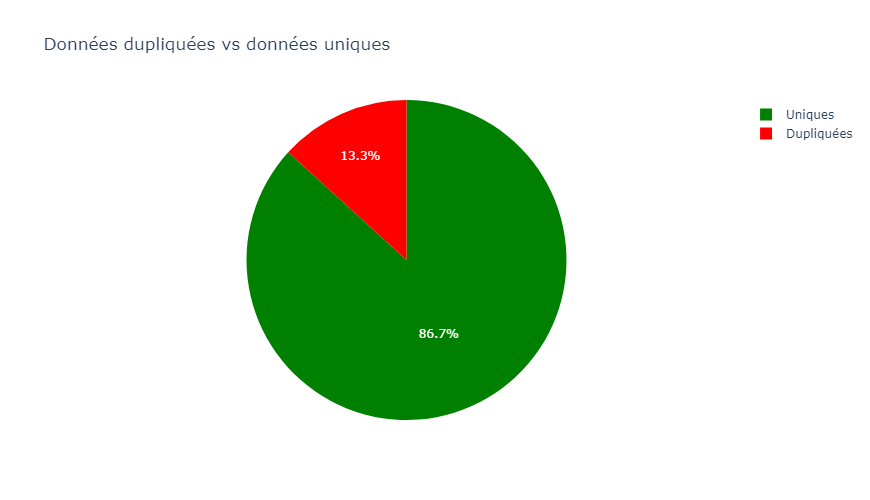

In [48]:
pie_chart_ploty(n_data, ["tiern_location_state_city", "tiern_name_preprocessed","Country"])

#### Distribution des données uniques et dupliquées  après suppressions des noms de ville, pays et des doublons dans les noms des fournisseurs

In [49]:
n_data["tiern_name_preprocessed"]=n_data["tiern_name_preprocessed"].map(remove_duplication)
# n_data.tail(5)

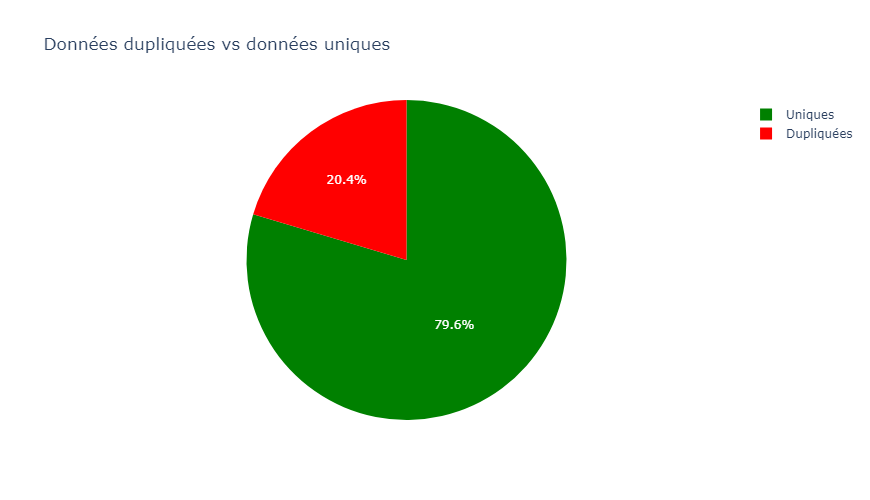

In [50]:
pie_chart_ploty(n_data, ["tiern_location_state_city", "tiern_name_preprocessed","Country"])

#### Visualisation des duplications sans consération des espace blanc dans les noms

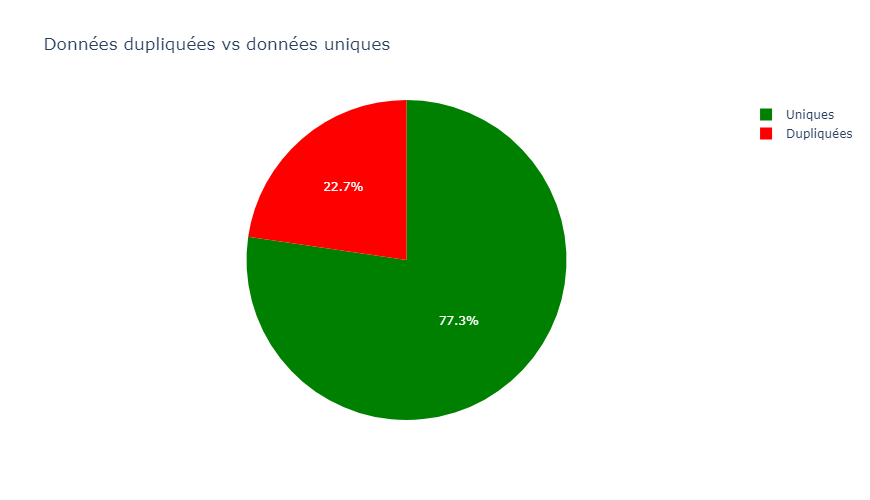

In [51]:
n_data["chars"] = n_data["tiern_name_preprocessed"].map(chaine_to_chars)
pie_chart_ploty(n_data, ["tiern_location_state_city", "chars","Country"])

## Traitement C
Traduction des noms des fournisseurs avant d'appliquer le traitement A

In [77]:
# Appliquer la fonction à chaque colonne du DataFrame
n_data=data.drop(["id", "confidence_country","confidence_city", "Latitude","Longitude"], axis=1).copy()
total_samples =n_data.shape[0]
# data.shape
n_data = process_dataframe_str(n_data)
# n_data.head()
n_data["tiern_name_concat_plant"] = n_data.apply(lambda row: row["tiern_name"] + " " + row["tiern_plant"], axis=1)
n_data["tiern_name_preprocessed"] = n_data["tiern_name_concat_plant"]
# n_data.head(5)
pattern=r'\d+'
dataframe_nombres=detect_pattern(n_data, "tiern_name_preprocessed", pattern)
n_data=n_data.drop(index=dataframe_nombres.index)
data.loc[[165,382, 455, 504,558, 652, 55663]][["tiern_location_state_city","tiern_name", "tiern_plant","Country"]]

,tiern_location_state_city,tiern_name,tiern_plant,Country
165,hefei,安徽凯瑞,安徽工厂,China
382,wuhan,sp122bq t1 2 gjss anjia wuhanl,NaN,China
455,wuhan,issi no 18,xmc wuhan,China
504,wuhan,wuhansp781bq t0 6 metalone 美达王 wuhan sunrise m...,metalone china中国 美达王 武汉 wuhan sunrise machiner...,China
558,bengbu,97017016,NaN,China
652,ningbo,101827,NaN,China
55663,anyang si,이한전자,NaN,South Korea


In [78]:
dataframe_nombres.head(30)

,tiern_location_state_city,tiern_name,tiern_plant,Country,tiern_name_concat_plant,tiern_name_preprocessed
43,tehran,fcaes 2366701x,,iran,fcaes 2366701x,fcaes 2366701x
79,tehran,crouse,plant 3,iran,crouse plant 3,crouse plant 3
263,wuhan,sp781b t0 75 gjss anjia wuhanl,,china,sp781b t0 75 gjss anjia wuhanl,sp781b t0 75 gjss anjia wuhanl
374,wuhan,xmc wuhan issi,no 18,china,xmc wuhan issi no 18,xmc wuhan issi no 18
380,wuhan,1 wuhan kotobukiya 2 han quan,wuhan plant wuhan plant,china,1 wuhan kotobukiya 2 han quan wuhan plant wuha...,1 wuhan kotobukiya 2 han quan wuhan plant wuha...
382,wuhan,sp122bq t1 2 gjss anjia wuhanl,,china,sp122bq t1 2 gjss anjia wuhanl,sp122bq t1 2 gjss anjia wuhanl
399,wuhan,1 wuhan kotobukiya,wuhan plant,china,1 wuhan kotobukiya wuhan plant,1 wuhan kotobukiya wuhan plant
455,wuhan,issi no 18,xmc wuhan,china,issi no 18 xmc wuhan,issi no 18 xmc wuhan
478,wuhan,sp716bq t2 gjss anjia wuhanl,,china,sp716bq t2 gjss anjia wuhanl,sp716bq t2 gjss anjia wuhanl
504,wuhan,wuhansp781bq t0 6 metalone 美达王 wuhan sunrise m...,metalone china中国 美达王 武汉 wuhan sunrise machiner...,china,wuhansp781bq t0 6 metalone 美达王 wuhan sunrise m...,wuhansp781bq t0 6 metalone 美达王 wuhan sunrise m...


In [79]:
# dataframe_char_speciaux=n_data.drop(index=dataframe_sans_char_speciaux.index)
# dataframe_char_speciaux.shape
pattern=r'[a-z]+'
dataframe_sans_char_speciaux=detect_pattern(n_data, "tiern_name_preprocessed", pattern)
# dataframe_sans_char_speciaux.shape
dataframe_char_speciaux=n_data.drop(index=dataframe_sans_char_speciaux.index)
dataframe_char_speciaux.shape

(143, 6)

In [80]:
dataframe_sans_char_speciaux.shape

(54830, 6)

In [56]:
54830 + 143

54973

In [57]:
dataframe_char_speciaux.head(5)

,tiern_location_state_city,tiern_name,tiern_plant,Country,tiern_name_concat_plant,tiern_name_preprocessed
153,zibo,石油化工股份有限公司齐鲁分公司,,china,石油化工股份有限公司齐鲁分公司,石油化工股份有限公司齐鲁分公司
165,hefei,安徽凯瑞,安徽工厂,china,安徽凯瑞 安徽工厂,安徽凯瑞 安徽工厂
167,hefei,安徽凯瑞汽配制造有限公司,安徽凯瑞汽配制造有限公司,china,安徽凯瑞汽配制造有限公司 安徽凯瑞汽配制造有限公司,安徽凯瑞汽配制造有限公司 安徽凯瑞汽配制造有限公司
169,hefei,安徽凯瑞,安徽凯瑞汽配制造有限公司,china,安徽凯瑞 安徽凯瑞汽配制造有限公司,安徽凯瑞 安徽凯瑞汽配制造有限公司
174,hefei,安徽佳元工业纤维有限公司,,china,安徽佳元工业纤维有限公司,安徽佳元工业纤维有限公司


In [58]:
translator = GoogleTranslator(source='auto', target='english')
dat= translation(translator, dataframe_char_speciaux["tiern_name_preprocessed"].tolist())

In [59]:
len(dat)

143

In [60]:
dataframe_char_speciaux["tiern_name_preprocessed"]=dat
dataframe_char_speciaux["tiern_name_preprocessed"]=dataframe_char_speciaux["tiern_name_preprocessed"].astype(str)

In [61]:
dataframe_char_speciaux.head()

,tiern_location_state_city,tiern_name,tiern_plant,Country,tiern_name_concat_plant,tiern_name_preprocessed
153,zibo,石油化工股份有限公司齐鲁分公司,,china,石油化工股份有限公司齐鲁分公司,"Petrochemical Co., Ltd. Qilu Branch"
165,hefei,安徽凯瑞,安徽工厂,china,安徽凯瑞 安徽工厂,Anhui Kairui Anhui Factory
167,hefei,安徽凯瑞汽配制造有限公司,安徽凯瑞汽配制造有限公司,china,安徽凯瑞汽配制造有限公司 安徽凯瑞汽配制造有限公司,"Anhui Kairui Auto Parts Manufacturing Co., Ltd..."
169,hefei,安徽凯瑞,安徽凯瑞汽配制造有限公司,china,安徽凯瑞 安徽凯瑞汽配制造有限公司,Anhui Kairui Anhui Kairui Auto Parts Manufactu...
174,hefei,安徽佳元工业纤维有限公司,,china,安徽佳元工业纤维有限公司,"Anhui Jiayuan Industrial Fiber Co., Ltd."


In [62]:
n_data=pd.concat((dataframe_sans_char_speciaux,dataframe_char_speciaux), axis=0)

In [63]:
n_data.shape

(54973, 6)

In [64]:
dataframe_sans_char_speciaux.shape

(54830, 6)

In [65]:
dataframe_char_speciaux.shape

(143, 6)

In [66]:
dataframe_char_speciaux.loc[dataframe_char_speciaux[["Country","tiern_location_state_city","tiern_name_preprocessed"]].duplicated(),:]

,tiern_location_state_city,tiern_name,tiern_plant,Country,tiern_name_concat_plant,tiern_name_preprocessed
31438,togliatti on the volga,евро деталь,евро деталь,russia,евро деталь евро деталь,euro detail euro detail


In [67]:
#n_data["tiern_name_preprocessed"]=n_data[["tiern_location_state_city", "tiern_name_preprocessed"]].map(suppr("tiern_name_preprocessed"))
n_data["tiern_name_preprocessed"] = n_data.apply(lambda row: remove_pattern(row["tiern_location_state_city"], row["tiern_name_preprocessed"]), axis=1)
n_data["tiern_name_preprocessed"] = n_data.apply(lambda row: remove_pattern(row["Country"], row["tiern_name_preprocessed"]), axis=1)
n_data["tiern_name_preprocessed"]=n_data["tiern_name_preprocessed"].map(remove_duplication)

In [68]:
dataframe_char_speciaux.loc[dataframe_char_speciaux[["Country","tiern_location_state_city","tiern_name_preprocessed"]].duplicated(),:]

,tiern_location_state_city,tiern_name,tiern_plant,Country,tiern_name_concat_plant,tiern_name_preprocessed
31438,togliatti on the volga,евро деталь,евро деталь,russia,евро деталь евро деталь,euro detail euro detail


In [69]:
# Appliquer la fonction à chaque colonne du DataFrame
n_data = process_dataframe_str(n_data)
n_data.tail()

,tiern_location_state_city,tiern_name,tiern_plant,Country,tiern_name_concat_plant,tiern_name_preprocessed
53920,ulsan,한일튜브,,south korea,한일튜브,hanil tube
54110,kimhae,한국부직포,,south korea,한국부직포,korean non-woven fabric
54236,kimhae,오토피엠테크,오토피엠테크,south korea,오토피엠테크 오토피엠테크,auto pm tech
54259,kimhae,주 광신아이앤피,주 광신아이앤피,south korea,주 광신아이앤피 주 광신아이앤피,"kwangshin i&p co., ltd."
55663,anyang si,이한전자,,south korea,이한전자,leehan electronics


In [70]:
pie_chart_ploty(n_data, ["tiern_location_state_city", "tiern_name_preprocessed","Country"])

#### Distribution des données uniques et dupliquées  après suppressions des noms de ville dans les noms des fournisseurs

In [71]:
#n_data["tiern_name_preprocessed"]=n_data[["tiern_location_state_city", "tiern_name_preprocessed"]].map(suppr("tiern_name_preprocessed"))
n_data["tiern_name_preprocessed"] = n_data.apply(lambda row: remove_pattern(row["tiern_location_state_city"], row["tiern_name_preprocessed"]), axis=1)
# n_data.head(5)

In [72]:
pie_chart_ploty(n_data, ["tiern_location_state_city", "tiern_name_preprocessed","Country"])

In [73]:
n_data["tiern_name_preprocessed"] = n_data.apply(lambda row: remove_pattern(row["Country"], row["tiern_name_preprocessed"]), axis=1)
# n_data.head(5)
pie_chart_ploty(n_data, ["tiern_location_state_city", "tiern_name_preprocessed","Country"])

In [74]:
n_data["tiern_name_preprocessed"]=n_data["tiern_name_preprocessed"].map(remove_duplication)
# n_data.tail(5)
pie_chart_ploty(n_data, ["tiern_location_state_city", "tiern_name_preprocessed","Country"])

In [75]:
# n_data["chars"] = n_data["tiern_name_preprocessed"].map(chaine_to_chars)
# visualisation(n_data, ["tiern_location_state_city", "chars","Country"])

NameError: name 'visualisation' is not defined

### Fonctions pour la détection de caratères spécifiques

In [ ]:

# nlp = spacy.load("en_core_web_sm")
# doc = detect_language(nlp,"鸿图电器有限公司")
# # document level language detection. Think of it like average language of document!
# print(doc)
# # # sentence level language detection
# # for i, sent in enumerate(doc.sents):
# #     print(sent, sent._.language_detected)